# Autoencoders

A simple concept, but applicable to many situations and tasks.
This chapter is very useful for a deeper understanding of them (Suggested reading) : https://www.deeplearningbook.org/contents/autoencoders.html <br>
A lot of the examples here are inspired from this guide: https://www.tensorflow.org/tutorials/generative/autoencoder#second_example_image_denoising<br>


## General structure
Autoencoders have to main parts, the **encoder** which converts the input data into **h** which is a typically smaller dimmensional space than the input data. And a **decoder** which tryes to convert that **h** back into the original image. Autoencoders are trained using **reconstruction error** which represents how different the outputed image is from the orignal.<br>
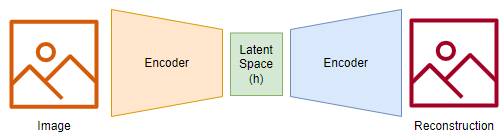<br>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [57]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [68]:
latent_dim = 64 

class Autoencoder1(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.build((None, 28, 28, 1))
autoencoder.save_weights("random_Autoencoder1_w.h5")

In [69]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0127 - val_loss: 0.0056
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.001

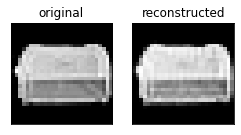

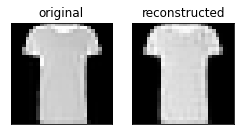

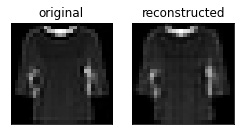

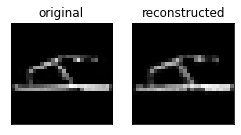

In [90]:
import random
for i, j in enumerate(random.sample(range(1, 6000), 4)):
    plt.figure(figsize = (4, 8))
    ax = plt.subplot(1, 2, 1)
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(x_test[j])
    ax = plt.subplot(1, 2, 2)
    plt.title("reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(autoencoder(x_test[j].reshape(1, 28, 28, 1))[0])

## Common Use Cases:
By itself this task doesn't really acheive much. However, what is interesting is the latent features that the autoencoder learns in order to compress the original image while maintaing enough information for reconstruction. Below are some common applications for autoencoders:

>## Feature extraction
The Encoder part of the network is good at extracting features that contain the most important and identifying information about the input image. So auto encoders could be trained with the intention of later graphting the Encoder onto the beginning of some other network.

>## Image denoising
This is an interesting application for autoencoders, the model is fed the original images with some added noise and the output is compared to the original image when calculating the reconstruction error. <br>
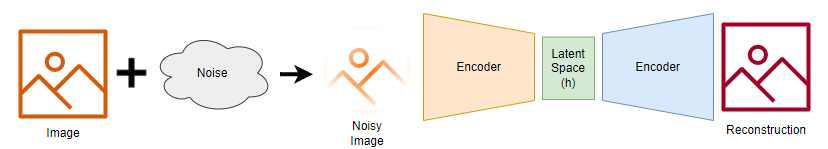

>## Anomaly detection
An autoencoder will be good at reconstructing data from the same distribution as the training set, but it will perform poorly on data from other distributions. So the reconstruction error of a trained autoencoder can be used to tell weather a sample is from the target distribution or is anomalous.

>## Learning a manifold (advance)

## Common pitfalls